In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
stream_views_df = pd.read_csv("generated/user_views_per_stream.csv", header=0)
stream_views_df.head()

,USERID,STREAMID,num_views,day_of_week,time_labeled,num_cards,views_per_card
0,245,163,1029,Wednesday,Afternoon,15,68.600000
1,245,167,258,Thursday,Afternoon,14,18.428571
2,245,171,123,Wednesday,Afternoon,6,20.500000
3,245,172,83,Wednesday,Afternoon,4,20.750000
4,245,173,167,Monday,Afternoon,8,20.875000


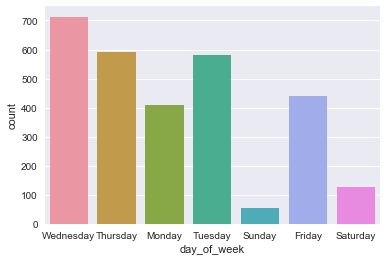

In [4]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="day_of_week", data=stream_views_df)

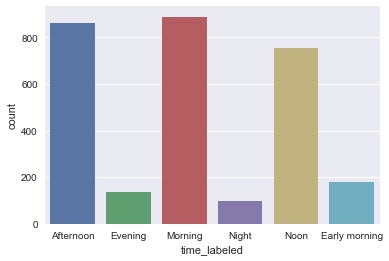

In [5]:
ax = sns.countplot(x="time_labeled", data=stream_views_df)

In [6]:
stream_views_df = stream_views_df[(stream_views_df["num_cards"] > 1) & (stream_views_df["num_views"] > 1)]
stream_views_df.head()

,USERID,STREAMID,num_views,day_of_week,time_labeled,num_cards,views_per_card
0,245,163,1029,Wednesday,Afternoon,15,68.600000
1,245,167,258,Thursday,Afternoon,14,18.428571
2,245,171,123,Wednesday,Afternoon,6,20.500000
3,245,172,83,Wednesday,Afternoon,4,20.750000
4,245,173,167,Monday,Afternoon,8,20.875000


## Cluster  the users and the streams and based on that set the values for user type and stream type - based on the views

In [7]:
content_views_per_user_df = pd.read_csv("../data/content_views_per_user_scaled.csv", header=0)
content_views_per_user_df.head()

,Unnamed: 0,163,167,171,172,173,178,179,184,185,...,1657,1658,1659,1660,1661,1662,1665,1668,1670,1677
0,245,1.000000,1.000000,1.000000,1.000000,1.000000,0.920755,0.2,0.25,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,246,0.040816,0.000000,0.000000,0.036145,0.000000,0.415094,0.2,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,247,0.299320,0.116279,0.276423,0.457831,0.479042,0.633962,0.4,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,248,0.014577,0.023256,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,249,0.119534,0.736434,0.113821,0.373494,0.125749,1.000000,0.2,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
new_column_names = ["UserId"]
new_column_names.extend(content_views_per_user_df.columns.values[1:])
content_views_per_user_df.columns = new_column_names
content_views_per_user_df.head()

,UserId,163,167,171,172,173,178,179,184,185,...,1657,1658,1659,1660,1661,1662,1665,1668,1670,1677
0,245,1.000000,1.000000,1.000000,1.000000,1.000000,0.920755,0.2,0.25,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,246,0.040816,0.000000,0.000000,0.036145,0.000000,0.415094,0.2,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,247,0.299320,0.116279,0.276423,0.457831,0.479042,0.633962,0.4,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,248,0.014577,0.023256,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,249,0.119534,0.736434,0.113821,0.373494,0.125749,1.000000,0.2,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
from sklearn.cluster import KMeans
user_id = content_views_per_user_df["UserId"].values
len(user_id)

219

In [11]:
content_views_per_user_df = content_views_per_user_df.drop("UserId", axis=1)
content_views_per_user_values = content_views_per_user_df.values
content_views_per_user_values.shape

(219, 153)

In [12]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42).fit(content_views_per_user_values)

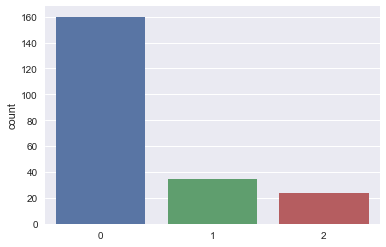

In [21]:
kmeans_k3.labels_
sns.countplot(x=kmeans_k3.labels_)

In [15]:
from sklearn.metrics import silhouette_score
ss_k3 = silhouette_score(content_views_per_user_values, kmeans_k3.labels_)
ss_k3

0.24214283319540458

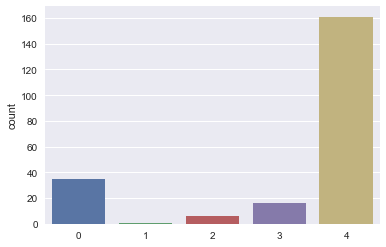

In [22]:
kmeans_k5 = KMeans(n_clusters=5, random_state=21).fit(content_views_per_user_values)
sns.countplot(x=kmeans_k5.labels_)

In [19]:
ss_k5 = silhouette_score(content_views_per_user_values, kmeans_k5.labels_)
ss_k5

0.2566075422041427

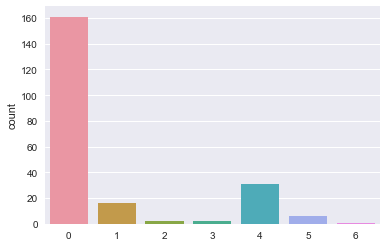

In [23]:
kmeans_k7 = KMeans(n_clusters=7, random_state=21).fit(content_views_per_user_values)
sns.countplot(x=kmeans_k7.labels_)

In [24]:
ss_k7 = silhouette_score(content_views_per_user_values, kmeans_k7.labels_)
ss_k7

0.30560460041320014

## Let us go with 3 clusters since they are more or equally distributed with no cluster having extremely low number of members

In [27]:
userid_cluster = list(zip(user_id, kmeans_k3.labels_))

In [28]:
userid_cluster_dict = {uc[0]: uc[1] for uc in userid_cluster}

In [30]:
stream_views_df["user_type"] = stream_views_df["USERID"].apply(lambda x: userid_cluster_dict.get(x))

In [31]:
stream_views_df.head()

,USERID,STREAMID,num_views,day_of_week,time_labeled,num_cards,views_per_card,user_type
0,245,163,1029,Wednesday,Afternoon,15,68.600000,0
1,245,167,258,Thursday,Afternoon,14,18.428571,0
2,245,171,123,Wednesday,Afternoon,6,20.500000,0
3,245,172,83,Wednesday,Afternoon,4,20.750000,0
4,245,173,167,Monday,Afternoon,8,20.875000,0
